In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
data=load_iris()
x_data=data.data
y_data=data.target


In [11]:
y_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3)


In [20]:
mlp=MLPClassifier(hidden_layer_sizes=(100,50),max_iter=500)
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [21]:
predictions=mlp.predict(x_test)
print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.93      1.00      0.96        13
          2       1.00      0.94      0.97        17

avg / total       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 13  0]
 [ 0  1 16]]


In [22]:
pca=decomposition.PCA(whiten=True,n_components=2)
pca.fit(x_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

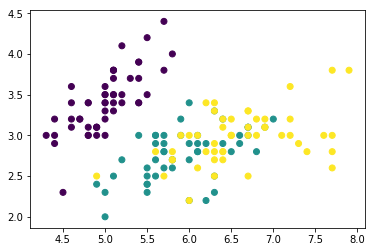

In [33]:
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)

In [23]:
x_train_pca=pca.transform(x_train)
x_train_pca.shape

(105, 2)

In [24]:
mlp=MLPClassifier(hidden_layer_sizes=(100,50),max_iter=500)
mlp.fit(x_train_pca,y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [25]:
x_test_pca=pca.transform(x_test)
x_test_pca.shape

(45, 2)

In [26]:
predictions=mlp.predict(x_test_pca)
print(classification_report(predictions,y_test))
print(confusion_matrix(predictions,y_test))


             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.93      1.00      0.96        13
          2       1.00      0.94      0.97        17

avg / total       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 13  0]
 [ 0  1 16]]
